In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/Train/Money',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/Train/Money',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 22 images belonging to 11 classes.
Found 22 images belonging to 11 classes.


In [6]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
#model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 43808)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [7]:
training_data.class_indices

{'100k': 0,
 '10k': 1,
 '1k': 2,
 '200': 3,
 '200k': 4,
 '20k': 5,
 '2k': 6,
 '500': 7,
 '500k': 8,
 '50k': 9,
 '5k': 10}

In [8]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=20)]
history=model.fit(training_data,
                  steps_per_epoch=len(training_data),
                  batch_size = 64,
                  epochs=50,
                  validation_data=validation_data,
                  validation_steps=len(validation_data),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 2.5870 - accuracy: 0.0909 - val_loss: 17.6682 - val_accuracy: 0.0909
Epoch 2/50
1/1 [==============================] - 5s 5s/step - loss: 17.5460 - accuracy: 0.0909 - val_loss: 22.3509 - val_accuracy: 0.0909
Epoch 3/50
1/1 [==============================] - 4s 4s/step - loss: 22.1366 - accuracy: 0.0909 - val_loss: 12.6733 - val_accuracy: 0.1818
Epoch 4/50
1/1 [==============================] - 3s 3s/step - loss: 12.6362 - accuracy: 0.1818 - val_loss: 4.4549 - val_accuracy: 0.0909
Epoch 5/50
1/1 [==============================] - 3s 3s/step - loss: 4.4054 - accuracy: 0.0909 - val_loss: 2.4738 - val_accuracy: 0.0909
Epoch 6/50
1/1 [==============================] - 2s 2s/step - loss: 2.4756 - accuracy: 0.1364 - val_loss: 2.3980 - val_accuracy: 0.0909
Epoch 7/50
1/1 [==============================] - 3s 3s/step - loss: 2.3966 - accuracy: 0.0909 - val_loss: 2.3780 - val_accuracy: 0.0909
Epoch 8/50
1/1 [===================

Sai số kiểm tra là:  0.038735780864953995
Độ chính xác kiểm tra là:  0.9545454382896423


<function matplotlib.pyplot.show>

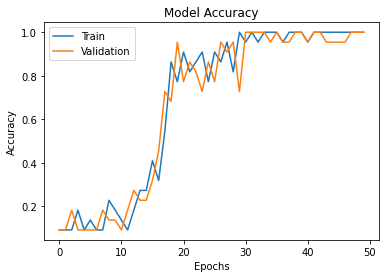

In [9]:
# Đánh giá chất lượng mô hình và đồ thị:
score = model.evaluate(validation_data,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [10]:
model.save('money.h1')
model=load_model('money.h1')

INFO:tensorflow:Assets written to: money.h1/assets


Đây là tờ 500 nghìn VNĐ 


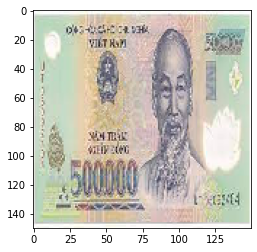

In [17]:
from tensorflow.keras.models import load_model
img=load_img("/content/drive/MyDrive/AI/Train/Money/500k/500k1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][8])==1:
  prediction='Đây là tờ 500 nghìn VNĐ '
if round(result[0][9])==1:
  prediction='Đây là tờ 50 nghìn VNĐ'
if round(result[0][10])==1:
  prediction='Đây là tờ 5 nghìn VNĐ'
print(prediction)

Đây là tờ 50 nghìn VNĐ


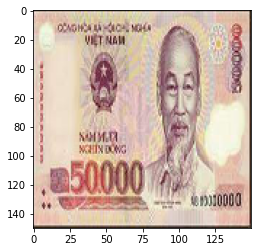

In [19]:
img=load_img("/content/drive/MyDrive/AI/Train/Money/50k/50k1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][8])==1:
  prediction='Đây là tờ 500 nghìn VNĐ '
if round(result[0][9])==1:
  prediction='Đây là tờ 50 nghìn VNĐ'
if round(result[0][10])==1:
  prediction='Đây là tờ 5 nghìn VNĐ'
print(prediction)

Đây là tờ 5 nghìn VNĐ


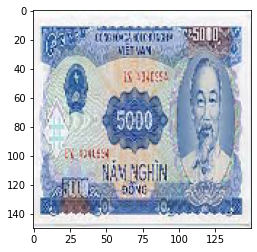

In [20]:
img=load_img("/content/drive/MyDrive/AI/Train/Money/5k/5k1.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][8])==1:
  prediction='Đây là tờ 500 nghìn VNĐ '
if round(result[0][9])==1:
  prediction='Đây là tờ 50 nghìn VNĐ'
if round(result[0][10])==1:
  prediction='Đây là tờ 5 nghìn VNĐ'
print(prediction)